# import Data


In [1]:
# Importing the pandas library for data manipulation
import pandas as pd

# Reading the CSV file and storing the data in a DataFrame
data = pd.read_csv('/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter_7 Supervised_ML/Data/housing_iteration_4_classification/housing_iteration_4_classification.csv')

In [2]:
data.head()

LotArea  LotFrontage  TotalBsmtSF  BedroomAbvGr  Fireplaces  PoolArea  \
0     8450         65.0          856             3           0         0   
1     9600         80.0         1262             3           1         0   
2    11250         68.0          920             3           1         0   
3     9550         60.0          756             3           1         0   
4    14260         84.0         1145             4           1         0   

   GarageCars  WoodDeckSF  ScreenPorch  Expensive  ... CentralAir Foundation  \
0           2           0            0          0  ...          Y      PConc   
1           2         298            0          0  ...          Y     CBlock   
2           2           0            0          0  ...          Y      PConc   
3           3           0            0          0  ...          Y     BrkTil   
4           3         192            0          0  ...          Y      PConc   

  ExterQual ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1 KitchenQual  \
0        Gd        TA       Gd       TA           No          GLQ          Gd   
1        TA        TA       Gd       TA           Gd          ALQ          TA   
2        Gd        TA       Gd       TA           Mn          GLQ          Gd   
3        TA        TA       TA       Gd           No          ALQ          Gd   
4        Gd        TA       Gd       TA           Av          GLQ          Gd   

  FireplaceQu  
0         NaN  
1          TA  
2          TA  
3          Gd  
4          TA  

[5 rows x 24 columns]

### checking columns for ordinal coding

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

## data splitting


In [3]:
y = data.pop('Expensive')

In [4]:
X = data.copy()

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)





## check for missing values


In [7]:
X_train.isna().sum() #LotFrontage, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, KitchenQual, FireplaceQu has missing values

LotArea           0
LotFrontage     217
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
MSZoning          0
Condition1        0
Heating           0
Street            0
CentralAir        0
Foundation        0
ExterQual         0
ExterCond         0
BsmtQual         28
BsmtCond         28
BsmtExposure     28
BsmtFinType1     28
KitchenQual       0
FireplaceQu     547
dtype: int64

In [8]:
X_test.isna().sum() #LotFrontage,BsmtExposure,FireplaceQu have missing values

LotArea           0
LotFrontage      42
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
MSZoning          0
Condition1        0
Heating           0
Street            0
CentralAir        0
Foundation        0
ExterQual         0
ExterCond         0
BsmtQual          9
BsmtCond          9
BsmtExposure     10
BsmtFinType1      9
KitchenQual       0
FireplaceQu     143
dtype: int64

## Building the preprocessor

In [9]:
# Importing the necessary libraries

from sklearn import set_config

# Setting the display configuration for scikit-learn
set_config(display='diagram', transform_output='pandas')


In [11]:
# Separate categorical and numerical features
X_cat = X.select_dtypes(exclude='number').copy()
X_num = X.select_dtypes(include='number').copy()
X_cat

MSZoning Condition1 Heating Street CentralAir Foundation ExterQual  \
0          RL       Norm    GasA   Pave          Y      PConc        Gd   
1          RL      Feedr    GasA   Pave          Y     CBlock        TA   
2          RL       Norm    GasA   Pave          Y      PConc        Gd   
3          RL       Norm    GasA   Pave          Y     BrkTil        TA   
4          RL       Norm    GasA   Pave          Y      PConc        Gd   
...       ...        ...     ...    ...        ...        ...       ...   
1455       RL       Norm    GasA   Pave          Y      PConc        TA   
1456       RL       Norm    GasA   Pave          Y     CBlock        TA   
1457       RL       Norm    GasA   Pave          Y      Stone        Ex   
1458       RL       Norm    GasA   Pave          Y     CBlock        TA   
1459       RL       Norm    GasA   Pave          Y     CBlock        Gd   

     ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1 KitchenQual  \
0           TA       Gd       TA           No          GLQ          Gd   
1           TA       Gd       TA           Gd          ALQ          TA   
2           TA       Gd       TA           Mn          GLQ          Gd   
3           TA       TA       Gd           No          ALQ          Gd   
4           TA       Gd       TA           Av          GLQ          Gd   
...        ...      ...      ...          ...          ...         ...   
1455        TA       Gd       TA           No          Unf          TA   
1456        TA       Gd       TA           No          ALQ          TA   
1457        Gd       TA       Gd           No          GLQ          Gd   
1458        TA       TA       TA           Mn          GLQ          Gd   
1459        TA       TA       TA           No          BLQ          TA   

     FireplaceQu  
0            NaN  
1             TA  
2             TA  
3             Gd  
4             TA  
...          ...  
1455          TA  
1456          TA  
1457          Gd  
1458         NaN  
1459         NaN  

[1460 rows x 14 columns]

In [28]:
#creating pipekine for numeric columns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
numeric_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [21]:
# creating pipeline for categorical columns
ordinal_cols_names = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu']
ordinal_cols = X_cat.columns.get_indexer(ordinal_cols_names)
non_ordinal_cols_names = set(X_cat.columns).difference(ordinal_cols_names)
onehot_cols =  X_cat.columns.get_indexer(non_ordinal_cols_names)

ordinal_cols


array([ 6,  7,  8,  9, 10, 11, 12, 13])

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
ordinal_cols_rank = [['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                     ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                     ['N_A', 'NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
                     ['N_A', 'NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
                     ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd'],
                     ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
                     ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                     ['N_A', 'NA','Po', 'Fa', 'TA', 'Gd', 'Ex']]

#define categorical preprocessor
categorical_preprocessor = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_cols_rank), ordinal_cols),
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), onehot_cols)
)

#create categorical_pipeline
categorical_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='N_A'),
                                 categorical_preprocessor)

#create final preprocessor
preprocessor = make_column_transformer(
    (numeric_pipe, X_num.columns),
    (categorical_pipe, X_cat.columns)
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('columntr...
                                                                                                               'Ex']]),
                                                                                   array([ 6,  7,  8,  9, 10, 11, 12, 13])),
                                                                                  ('onehotencoder',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore',
                                                                                                 sparse_output=False),
                                                                                   array([4, 2, 3, 5, 1, 0]))]))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])

## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
# full pipeline = preprocessor + model
full_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)


In [38]:
#importing necessary modules
from sklearn.model_selection import GridSearchCV

param_grid = {
    'columntransformer__pipeline-1__simpleimputer__strategy':['mean', 'median'],
    'decisiontreeclassifier__criterion':['gini', 'entropy'],
    'decisiontreeclassifier__max_depth':range(2,14,2),
    'decisiontreeclassifier__min_samples_split':range(2,14,2),
    'decisiontreeclassifier__min_samples_leaf':range(3,12,2),
    'decisiontreeclassifier__max_features':['sqrt', 'log2', 4],
    'decisiontreeclassifier__max_leaf_nodes':range(2,15,2)
    
}

#define GridSearchCV
dt_search = GridSearchCV(full_pipeline,
                         param_grid,
                         cv=5,
                         verbose=1)
dt_search.fit(X_train,y_train)
scores = {'dtree':dt_search.best_score_}
print(scores)


Fitting 5 folds for each of 15120 candidates, totalling 75600 fits


/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sadiakhanrupa/anaconda3/l

{'dtree': 0.9263636697113092}


# Error Analysis

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(dt_search.predict(X_test), y_test)

0.9075342465753424

# confusion metrix

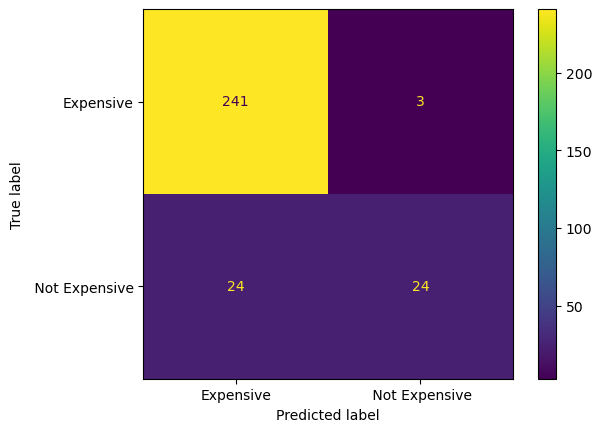

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_search,
                                      X_test,
                                      y_test,
                                      display_labels=['Expensive', ' Not Expensive']);